                                    Bank Customer Churn Prediction Dataset Analysis Project 

A Bank Customer Churn Prediction Analysis Project is a ML Project which is supervised machine learning project for the binary classification model that identifies the customers which are likely to stop using a bank'sservices based on the historical data. 

It basicalyy tells a bank that which customers are likely st risk allowing for proactive measures to be taken on time for the retention strategies. 

1 represents a customer who basically left the bank and 0 represents a customer who remained in the bank. 

Here, we will be using the Random Forest Classifier Algorithm for making the predictions as it gives the accurate value and also useful for calculating the probability of the customer churn. 

In [2]:
# importing the libraries  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv("Customer_Churn.csv") 
data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


This tells us the columns present in the whole dataset and we have to select, among which the whole predictions have to be made. 

The most necessary features which are must to include in the prediction include the : 

1. Total Charges 
2. Monthly Charges 
3. Tenure 
4. Contract Tyep  
5. Internet Service 
6. Payment Method 
7. Tech Support 
8. Online Security
9. PaperlesBiling

In [8]:
# Filtering out the important features include the : 

important_features = [

    "TotalCharges",
    "MonthlyCharges",
    "tenure", 
    "Contract",
    "InternetService",
    "PaymentMethod",
    "TechSupport", 
    "OnlineSecurity",
    "PaperlessBilling",
    "Churn"
] 

data2 = data[important_features] 

data2 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling,Churn
0,29.85,29.85,1,Month-to-month,DSL,Electronic check,No,No,Yes,No
1,1889.5,56.95,34,One year,DSL,Mailed check,No,Yes,No,No
2,108.15,53.85,2,Month-to-month,DSL,Mailed check,No,Yes,Yes,Yes
3,1840.75,42.30,45,One year,DSL,Bank transfer (automatic),Yes,Yes,No,No
4,151.65,70.70,2,Month-to-month,Fiber optic,Electronic check,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,1990.5,84.80,24,One year,DSL,Mailed check,Yes,Yes,Yes,No
7039,7362.9,103.20,72,One year,Fiber optic,Credit card (automatic),No,No,Yes,No
7040,346.45,29.60,11,Month-to-month,DSL,Electronic check,No,Yes,Yes,No
7041,306.6,74.40,4,Month-to-month,Fiber optic,Mailed check,No,No,Yes,Yes


Here, as we can see that the features have been seperated. Now, we will explain that, why these 9 features are the moost important. 

1. Total charges : It shows the total money spent by the customer. customers with low total charges, are usually new and have higher churn.  

2. Monthly charges : The high monthly bills strongly ncrease the churn risk.  

3. Tenure : It refers to the number oof months customers stayed.  
           Short tenure means a very high churn possibility but in the case of long tenure the churn possibility is very small.  

4. Contract type is also a very powerful data as because the lowest contracct has the highest possibility to churn  

5. Internet Service users churn more as because the fiber optics are more expensive and hence more service complaints.  

6. Payment Method : Highest Churn on the electronic check users and low churn in auto payment users.  

7. Tech Support Availability also a major factor as because the customers without support are much more likely to leave.  

8. Online Security is also a great factor as because the customers without security have higher churn rates. 

9. Paperless billing : Paperless billing users have a slightly higher churn. 

Now, comes the important step of  converting the categorical data into the numerical data as: 

In [9]:
numerical = data2.filter(['TotalCharges', 'MonthlyCharges', 'tenure'])
numerical 

,TotalCharges,MonthlyCharges,tenure
0,29.85,29.85,1
1,1889.5,56.95,34
2,108.15,53.85,2
3,1840.75,42.30,45
4,151.65,70.70,2
...,...,...,...
7038,1990.5,84.80,24
7039,7362.9,103.20,72
7040,346.45,29.60,11
7041,306.6,74.40,4


In [10]:
# Now, we want the categorical data 

categorical = data2.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis= 1) 
categorical 

,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling,Churn
0,Month-to-month,DSL,Electronic check,No,No,Yes,No
1,One year,DSL,Mailed check,No,Yes,No,No
2,Month-to-month,DSL,Mailed check,No,Yes,Yes,Yes
3,One year,DSL,Bank transfer (automatic),Yes,Yes,No,No
4,Month-to-month,Fiber optic,Electronic check,No,No,Yes,Yes
...,...,...,...,...,...,...,...
7038,One year,DSL,Mailed check,Yes,Yes,Yes,No
7039,One year,Fiber optic,Credit card (automatic),No,No,Yes,No
7040,Month-to-month,DSL,Electronic check,No,Yes,Yes,No
7041,Month-to-month,Fiber optic,Mailed check,No,No,Yes,Yes


In [11]:
print(categorical["Contract"].unique())
print(categorical["InternetService"].unique())
print(categorical["PaymentMethod"].unique())
print(categorical["TechSupport"].unique())
print(categorical["OnlineSecurity"].unique())
print(categorical["PaperlessBilling"].unique())
print(categorical["Churn"].unique()) 


['Month-to-month' 'One year' 'Two year']
['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']
['No' 'Yes']


In [12]:
# Converting to the whole data into the numerical data 

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

for col in categorical.columns:  
    categorical[col] =le.fit_transform(categorical[col]) 

categorical 

,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling,Churn
0,0,0,2,0,0,1,0
1,1,0,3,0,2,0,0
2,0,0,3,0,2,1,1
3,1,0,0,2,2,0,0
4,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...
7038,1,0,3,2,2,1,0
7039,1,1,1,0,0,1,0
7040,0,0,2,0,2,1,0
7041,0,1,3,0,0,1,1


In [13]:
print(categorical["Contract"].unique())
print(categorical["InternetService"].unique())
print(categorical["PaymentMethod"].unique())
print(categorical["TechSupport"].unique())
print(categorical["OnlineSecurity"].unique())
print(categorical["PaperlessBilling"].unique())
print(categorical["Churn"].unique()) 


[0 1 2]
[0 1 2]
[2 3 0 1]
[0 2 1]
[0 2 1]
[1 0]
[0 1]


Now, we can make the analysis between the encoding and the actual values as: 

Contract :  Month-Month - 0, 1Year - 1, 2Year - 2 

InternetService : DSl - 0, Fiber Optic - 1, No Internet - 2 

Payment Method : Electronic check - 2, mailed check - 3, Bank Transfer - 0, Credit card - 1 

Tech Support : No -0, Yes - 2, No  Internet Service - 1 

Online Security : No-0,  Yes-2, Internet Service- 1 

Paper Less Billing : Yes - 1, No - 0 

Churn : No - 0, Yes - 1 

In [14]:
# Now, we will combine the data as  

data3 =pd.concat([numerical, categorical], axis = 1)
data3 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling,Churn
0,29.85,29.85,1,0,0,2,0,0,1,0
1,1889.5,56.95,34,1,0,3,0,2,0,0
2,108.15,53.85,2,0,0,3,0,2,1,1
3,1840.75,42.30,45,1,0,0,2,2,0,0
4,151.65,70.70,2,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,1990.5,84.80,24,1,0,3,2,2,1,0
7039,7362.9,103.20,72,1,1,1,0,0,1,0
7040,346.45,29.60,11,0,0,2,0,2,1,0
7041,306.6,74.40,4,0,1,3,0,0,1,1


In [15]:
data3.isnull().value_counts() 

TotalCharges  MonthlyCharges  tenure  Contract  InternetService  PaymentMethod  TechSupport  OnlineSecurity  PaperlessBilling  Churn
False         False           False   False     False            False          False        False           False             False    7043
Name: count, dtype: int64

In [16]:
data3["TotalCharges"] = pd.to_numeric(data3["TotalCharges"], errors="coerce")


In [17]:
# removing the missing values 
data3.dropna(inplace = True) 
data3 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling,Churn
0,29.85,29.85,1,0,0,2,0,0,1,0
1,1889.50,56.95,34,1,0,3,0,2,0,0
2,108.15,53.85,2,0,0,3,0,2,1,1
3,1840.75,42.30,45,1,0,0,2,2,0,0
4,151.65,70.70,2,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,0,3,2,2,1,0
7039,7362.90,103.20,72,1,1,1,0,0,1,0
7040,346.45,29.60,11,0,0,2,0,2,1,0
7041,306.60,74.40,4,0,1,3,0,0,1,1


Now, an important step of seperating the features and labels will be done as: 

In [18]:
x = data3.drop(["Churn"], axis = 1) 
x 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
0,29.85,29.85,1,0,0,2,0,0,1
1,1889.50,56.95,34,1,0,3,0,2,0
2,108.15,53.85,2,0,0,3,0,2,1
3,1840.75,42.30,45,1,0,0,2,2,0
4,151.65,70.70,2,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,0,3,2,2,1
7039,7362.90,103.20,72,1,1,1,0,0,1
7040,346.45,29.60,11,0,0,2,0,2,1
7041,306.60,74.40,4,0,1,3,0,0,1


In [19]:
y = data3.filter(["Churn"], axis = 1) 
y 

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [20]:
# Now, we train, test and split the data to do the further processing 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42) 

In [21]:
x_train # data on which model is trained 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
6030,2076.20,49.05,43,0,0,0,0,0,1
3410,188.70,53.40,3,0,0,1,0,0,0
5483,4458.15,77.75,55,0,1,2,0,0,1
5524,2553.70,54.65,45,2,0,0,2,2,0
6337,5448.60,100.90,55,1,1,3,0,2,0
...,...,...,...,...,...,...,...,...,...
3778,137.25,50.40,3,0,0,0,0,0,0
5199,5703.25,111.50,51,1,1,2,2,0,1
5235,784.45,81.15,9,0,1,2,0,2,1
5399,989.05,19.75,50,1,2,0,1,1,0


In [22]:
x_test 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
2481,1501.75,25.00,61,2,2,0,1,1,0
6784,465.85,24.70,19,0,2,0,1,1,0
6125,1359.00,102.25,13,0,1,1,0,0,1
3052,2030.75,55.05,37,0,0,3,0,2,1
4099,161.45,29.45,6,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
1733,19.05,19.05,1,0,2,3,1,1,0
5250,1173.55,94.55,12,0,1,2,0,0,0
5465,1553.20,56.05,26,1,0,3,0,0,1
5851,3836.30,110.80,35,1,1,0,2,2,1


In [23]:
y_train 

,Churn
6030,1
3410,1
5483,1
5524,0
6337,0
...,...
3778,0
5199,0
5235,0
5399,0


In [24]:
y_test 

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0
...,...
1733,0
5250,0
5465,0
5851,0


In [25]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier() 

classifier = model.fit(x_train, y_train) 
classifier 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = classifier.predict(x_test) 
y_pred 

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [27]:
# Making the probability prediction 
y_prob = classifier.predict_proba(x_test)[:,1] 
y_prob 

array([0.  , 0.07, 0.68, ..., 0.09, 0.15, 0.  ], shape=(1407,))

Now, to perform the metrics, we will perform the metrics evaluation as the; 

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

print("Accuracy Score: ", accuracy_score(y_test, y_pred)) 

print("\nClassification Report:\n", classification_report(y_test, y_pred)) 

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))   

# The accuracy of the model comes out to be around 77% 

Accuracy Score:  0.7761194029850746

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.76      1407


Confusion Matrix:
 [[923 110]
 [205 169]]


As, we can see above that the whole analysis part is done with achieving a fair frequency. Now, comes the part of the plotting oof the visualization by plotting the graphs and all the plots sequentially to make the project more interesting and preditable. 

In [29]:
def plot_histogram(data3, column_name): 
    plt.figure(figsize = (5,3)) 
    sns.histplot(data3[column_name], kde = True) 
    plt.title(f"Distribution of {column_name}") 

    # calculate the mean and the median values of the columns 
    col_mean = data3[column_name].mean() 
    col_median = data3[column_name].median()  

    # adding of thr vartial lines for the mean and median 
    plt.axvline(col_mean, color = "red", linestyle = "--", label = "Mean") 
    plt.axvline(col_median,color ="green", linestyle = "-", label = "Median")  

    plt.legend()
    plt.show() 

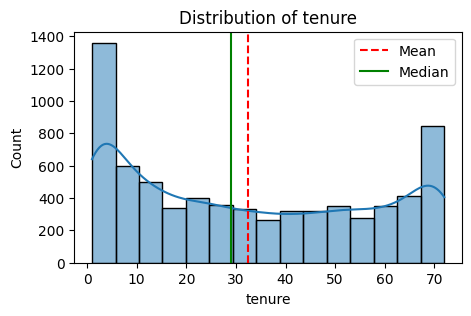

In [30]:
plot_histogram(data3, "tenure") 

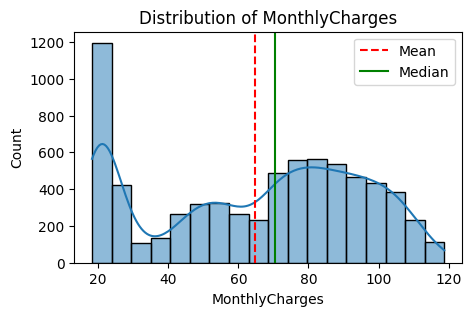

In [31]:
plot_histogram(data3, "MonthlyCharges") 

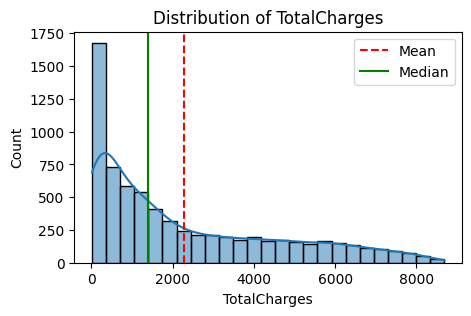

In [32]:
plot_histogram(data3, "TotalCharges") 

Now, we plot the box plots for the following features as: 

In [33]:
def box_plot(data3, column_name): 

    plt.figure(figsize = (5,3)) 
    sns.boxplot(y=data3[column_name]) 
    plt.title(f"Box plot of {column_name}") 
    plt.ylabel(column_name) 
    plt.show() 

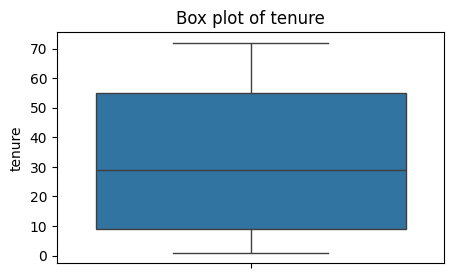

In [34]:
box_plot(data3, "tenure") 

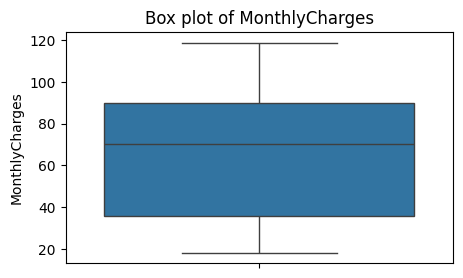

In [35]:
box_plot(data3, "MonthlyCharges") 

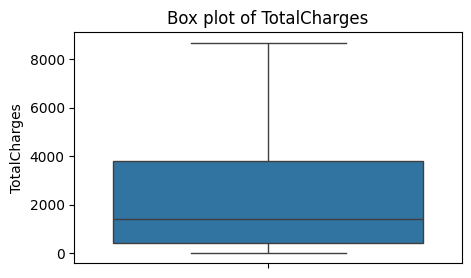

In [36]:
box_plot(data3, "TotalCharges") 

Now, comes the plotting of the Correlation Heatmap of the whole data.  

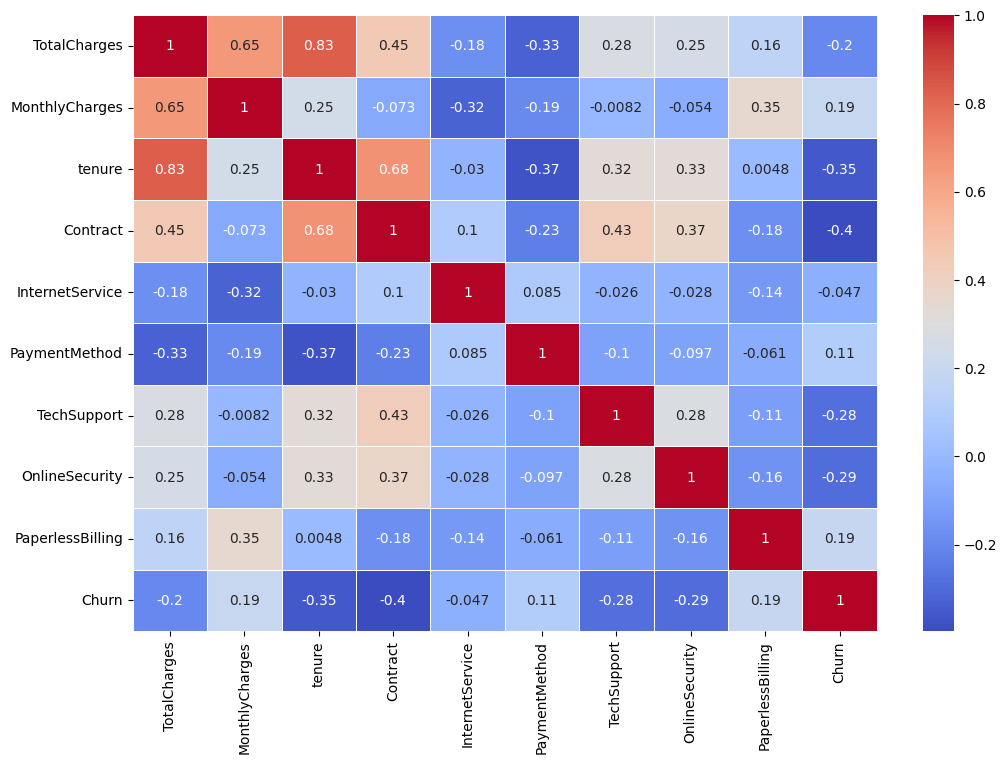

In [37]:
plt.figure(figsize = (12,8)) 

corr_matrix = data3.corr() 

sns.heatmap(data3.corr(), annot = True, cmap = "coolwarm", linewidths = 0.5) 

plt.show() 

From the above coorelation heatmap we can make an inference that the 4 most important features among the 8 are mainly: 

1. total Charges 
2. Month;y Charges 
3. Tenure 
4. Contract 

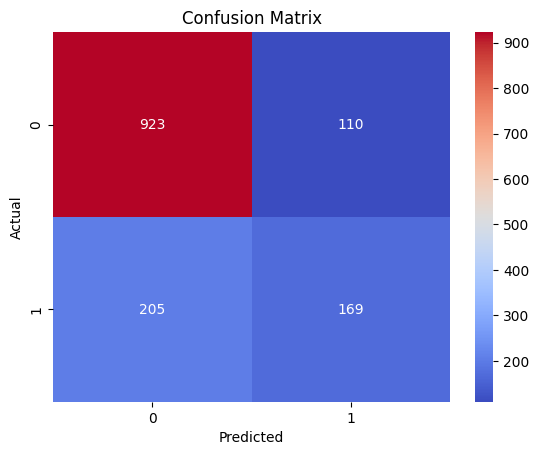

In [39]:
# Now, we plot the confusion matrix in the plot as: 

cm = confusion_matrix(y_test,y_pred) 

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm') 

plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show() 

# Making Predictions 
Now, we will start making the predictions and hence this will show, whether it is working correct or not. 

In [40]:
data3.iloc[100] 

TotalCharges        20.2
MonthlyCharges      20.2
tenure               1.0
Contract             0.0
InternetService      2.0
PaymentMethod        3.0
TechSupport          1.0
OnlineSecurity       1.0
PaperlessBilling     0.0
Churn                0.0
Name: 100, dtype: float64

In [ ]:
single_record = (x.values[100].reshape(1,-1)) 

predicted_outcome =  classifier.predict(single_record) 

print(predicted_outcome)  

# Here as we can see that the correct pprediction has been made and hence it shows that the model is working perfectly 

[0]


c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Making the predictions on the new data 

In [44]:
new_customer = pd.DataFrame({
    "TotalCharges": [1500],
    "MonthlyCharges": [80],
    "tenure": [12],
    "Contract": ["Month-to-month"],
    "InternetService": ["Fiber optic"],
    "PaymentMethod": ["Electronic check"],
    "TechSupport": ["No"],
    "OnlineSecurity": ["No"],
    "PaperlessBilling": ["Yes"]
}) 

new_customer 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
0,1500,80,12,Month-to-month,Fiber optic,Electronic check,No,No,Yes


In [47]:
new_customer = pd.get_dummies(new_customer)
new_customer = new_customer.reindex(columns=x.columns, fill_value=0)
new_customer 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
0,1500,80,12,0,0,0,0,0,0


In [48]:
# Now, the prediction will be done 

prediction = classifier.predict(new_customer) 
probability = classifier.predict_proba(new_customer)[:,1]

print("Prediction:", "Will Churn" if prediction[0] == 1 else "Will Stay") 

print("Probability of churn: ", round(probability[0],2)) 



Prediction: Will Stay
Probability of churn:  0.13


In [49]:
new_customer2 = pd.DataFrame({
    "TotalCharges": [120],
    "MonthlyCharges": [80],
    "tenure": [1],
    "Contract": ["Month-to-month"],
    "InternetService": ["Fiber optic"],
    "PaymentMethod": ["Mailed check"],
    "TechSupport": ["No"],
    "OnlineSecurity": ["No"],
    "PaperlessBilling": ["Yes"] 
}) 

new_customer2  

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
0,120,80,1,Month-to-month,Fiber optic,Mailed check,No,No,Yes


In [50]:
new_customer2 = pd.get_dummies(new_customer2)
new_customer2 = new_customer2.reindex(columns=x.columns, fill_value=0)
new_customer2 

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity,PaperlessBilling
0,120,80,1,0,0,0,0,0,0


In [51]:
prediction = classifier.predict(new_customer2) 
probability = classifier.predict_proba(new_customer2)[:,1]

print("Prediction:", "Will Churn" if prediction[0] == 1 else "Will Stay") 

print("Probability of churn: ", round(probability[0],2)) 


Prediction: Will Churn
Probability of churn:  0.6
